In [1]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sklearn
print(sklearn.__version__)

1.5.1


In [3]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [4]:
def load_data(url):
    import pandas as pd
    # Load dataset
    data = pd.read_csv(filepath_or_buffer=url,sep=',')
    return data

In [5]:
def train_test_split(final_data,target_column):
    from sklearn.model_selection import train_test_split
    X = final_data.loc[:, final_data.columns != target_column]
    y = final_data.loc[:, final_data.columns == target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y, random_state=47)
    return X_train, X_test, y_train, y_test

In [6]:
def training_basic_classifier(X_train,y_train):
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression()
    classifier.fit(X_train,y_train)
    
    return classifier

In [7]:
def predict_on_test_data(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [8]:
def predict_prob_on_test_data(model,X_test):
    y_pred = model.predict_proba(X_test)
    return y_pred

In [9]:
def get_metrics(y_true, y_pred, y_pred_prob):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred,average='micro')
    recall = recall_score(y_true, y_pred,average='micro')
    entropy = log_loss(y_true, y_pred_prob)
    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2), 'entropy': round(entropy, 2)}

In [10]:
def create_roc_auc_plot(clf, X_data, y_data):
    import matplotlib.pyplot as plt
    from sklearn import metrics
    metrics.plot_roc_curve(clf, X_data, y_data) 
    plt.savefig('roc_auc_curve.png')

In [11]:
def create_confusion_matrix_plot(clf, X_test, y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_confusion_matrix
    plot_confusion_matrix(clf, X_test, y_test)
    plt.savefig('confusion_matrix.png')

Data loading

In [12]:
url = 'Iris.csv'
data = load_data(url)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
target_column = 'Species'
X_train, X_test, y_train, y_test = train_test_split(data, target_column)

In [14]:
X_test.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
26,27,5.0,3.4,1.6,0.4
41,42,4.5,2.3,1.3,0.3
49,50,5.0,3.3,1.4,0.2
44,45,5.1,3.8,1.9,0.4
141,142,6.9,3.1,5.1,2.3


In [15]:
model = training_basic_classifier(X_train,y_train)

C:\Users\dgldr\anaconda3\envs\envname\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dgldr\anaconda3\envs\envname\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
y_pred = predict_on_test_data(model,X_test)
print(y_pred)
y_pred_prob = predict_prob_on_test_data(model,X_test)
print(y_pred_prob)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor']
[[9.68067421e-01 3.19325790e-02 3.73317310e-12]
 [5.86857090e-01 4.13142909e-01 7.12888095e-10]
 [8.68105935e-01 1.31894062e-01 2.55797787e-09]
 [9.09040393e-01 9.09596055e-02 1.31936705e-09]
 [1.97869538e-10 2.64052300e-06 9.99997359e-01]
 [2.30257815e

In [17]:
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)

In [18]:
run_metrics

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'entropy': 0.05}

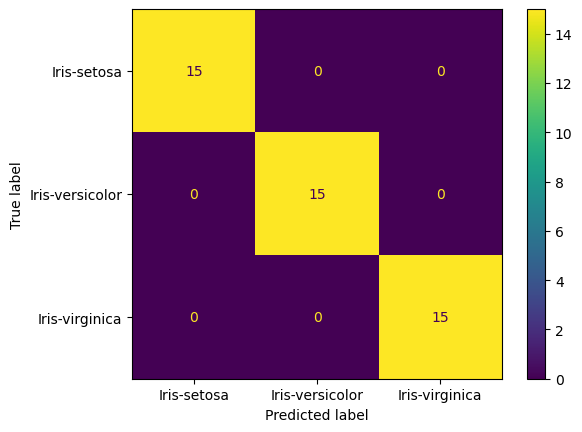

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

def create_confusion_matrix_plot(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
    plt.savefig('confusion_matrix.png')

# Supongamos que 'model', 'X_test', y 'y_test' ya están definidos
create_confusion_matrix_plot(model, X_test, y_test)


In [20]:
experiment_name = "basic_classifier"
run_name="term_deposit"
run_metrics = get_metrics(y_test, y_pred, y_pred_prob)
print(run_metrics)

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'entropy': 0.05}


Conexion MLFlow

In [23]:
import mlflow
mlflow.set_tracking_uri("wasbs://<mlflow>@<almacenamientomlops>.blob.core.windows.net")

In [25]:
!pip show azure-identity azure-storage-blob

Name: azure-identity
Version: 1.17.1
Summary: Microsoft Azure Identity Library for Python
Home-page: https://github.com/Azure/azure-sdk-for-python/tree/main/sdk/identity/azure-identity
Author: Microsoft Corporation
Author-email: azpysdkhelp@microsoft.com
License: MIT License
Location: C:\Users\dgldr\anaconda3\Lib\site-packages
Requires: azure-core, cryptography, msal, msal-extensions, typing-extensions
Required-by: 
---
Name: azure-storage-blob
Version: 12.21.0
Summary: Microsoft Azure Blob Storage Client Library for Python
Home-page: https://github.com/Azure/azure-sdk-for-python/tree/main/sdk/storage/azure-storage-blob
Author: Microsoft Corporation
Author-email: ascl@microsoft.com
License: MIT License
Location: C:\Users\dgldr\anaconda3\Lib\site-packages
Requires: azure-core, cryptography, isodate, typing-extensions
Required-by: 


In [26]:
import sys
print(sys.executable)

C:\Users\dgldr\anaconda3\envs\envname\python.exe


In [27]:
import os
from azure.identity import DefaultAzureCredential
from azure.storage.blob import BlobServiceClient

In [28]:
os.environ["AZURE_STORAGE_ACCOUNT"] = "<almacenamientomlops>"
os.environ["AZURE_STORAGE_KEY"] = "<DefaultEndpointsProtocol=https;AccountName=almacenamientomlops;AccountKey=Hck38nSe+jmsug3Db2OIJvR8Lsd3TvDQyjCML6CrJo2g+5BlH4htn5O44TbNCosOPyLeB21bJAh1+AStloR9GQ==;EndpointSuffix=core.windows.net>"

In [31]:
def create_experiment(experiment_name,run_name, run_metrics,model, confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    import mlflow
    mlflow.set_tracking_uri("http://localhost:5000") 
    #use above line if you want to use any database like sqlite as backend storage for model else comment this line
    mlflow.set_experiment("Flores")
    
    with mlflow.start_run(run_name=run_name):
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Iris Classifier")
        mlflow.set_tags({"tag2":"Logistic Regression", "tag3":"Multiclassification using Ovr - One vs rest class"})
        mlflow.sklearn.log_model(model, "model")
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))

In [1]:
import mlflow
import mlflow.sklearn

mlflow.set_experiment("basic_classifier")
with mlflow.start_run(run_name="term_deposit") as run:
    mlflow.log_param("model_type", "LogisticRegression")
    mlflow.log_param("target_column", target_column)

2024/08/12 23:49:31 WARNING mlflow.store.db.utils: SQLAlchemy engine could not be created. The following exception is caught.
(MySQLdb.OperationalError) (1045, "Access denied for user 'mlflow_user'@'localhost' (using password: YES)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)
Operation will be retried in 0.1 seconds
2024/08/12 23:49:31 WARNING mlflow.store.db.utils: SQLAlchemy engine could not be created. The following exception is caught.
(MySQLdb.OperationalError) (1045, "Access denied for user 'mlflow_user'@'localhost' (using password: YES)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)
Operation will be retried in 0.3 seconds
2024/08/12 23:49:32 WARNING mlflow.store.db.utils: SQLAlchemy engine could not be created. The following exception is caught.
(MySQLdb.OperationalError) (1045, "Access denied for user 'mlflow_user'@'localhost' (using password: YES)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)
Operation will be retried in 0.7 

OperationalError: (MySQLdb.OperationalError) (1045, "Access denied for user 'mlflow_user'@'localhost' (using password: YES)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [ ]:
# Logging metrics
    mlflow.log_metrics(run_metrics)
    
    # Log model
    mlflow.sklearn.log_model(model, "model")

    # Log confusion matrix and ROC AUC curve as artifacts
    create_confusion_matrix_plot(model, X_test, y_test)
    mlflow.log_artifact("confusion_matrix.png")

    create_roc_auc_plot(model, X_test, y_test)
    mlflow.log_artifact("roc_auc_curve.png")

In [ ]:

print(f"Run completed. Run ID: {run.info.run_id}")